In [3]:
pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/f7/86/4509e952f9724f084625e93e0bf8d8519b25c79029a0a916b0f996644c75/fbprophet-0.6.tar.gz
  Complete output from command C:\Users\GT\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\GT\\AppData\\Local\\Temp\\pip-install-t62yy1as\\fbprophet\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\GT\AppData\Local\Temp\pip-wheel-pzmnegk1 --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ad32c37d592cdbc572cbc332ac6d2ee2 NOW.
  error: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/
  
  ----------------------------------------
  Runn

  Failed building wheel for fbprophet
Command "C:\Users\GT\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\GT\\AppData\\Local\\Temp\\pip-install-t62yy1as\\fbprophet\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\GT\AppData\Local\Temp\pip-record-vlqutv6b\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\GT\AppData\Local\Temp\pip-install-t62yy1as\fbprophet\


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import folium
import branca
%matplotlib inline
import scipy.stats as norm
import calmap
import seaborn as sns
import pandas as pd
import numpy as np
from fbprophet import GT

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
Unnamed: 0      1517 non-null float64
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null float64
region          1517 non-null object
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [5]:
df.shape

(16468, 14)

In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [7]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.shape

(1517, 14)

In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
MiamiFtLauderdale      17
DallasFtWorth          17
Roanoke     

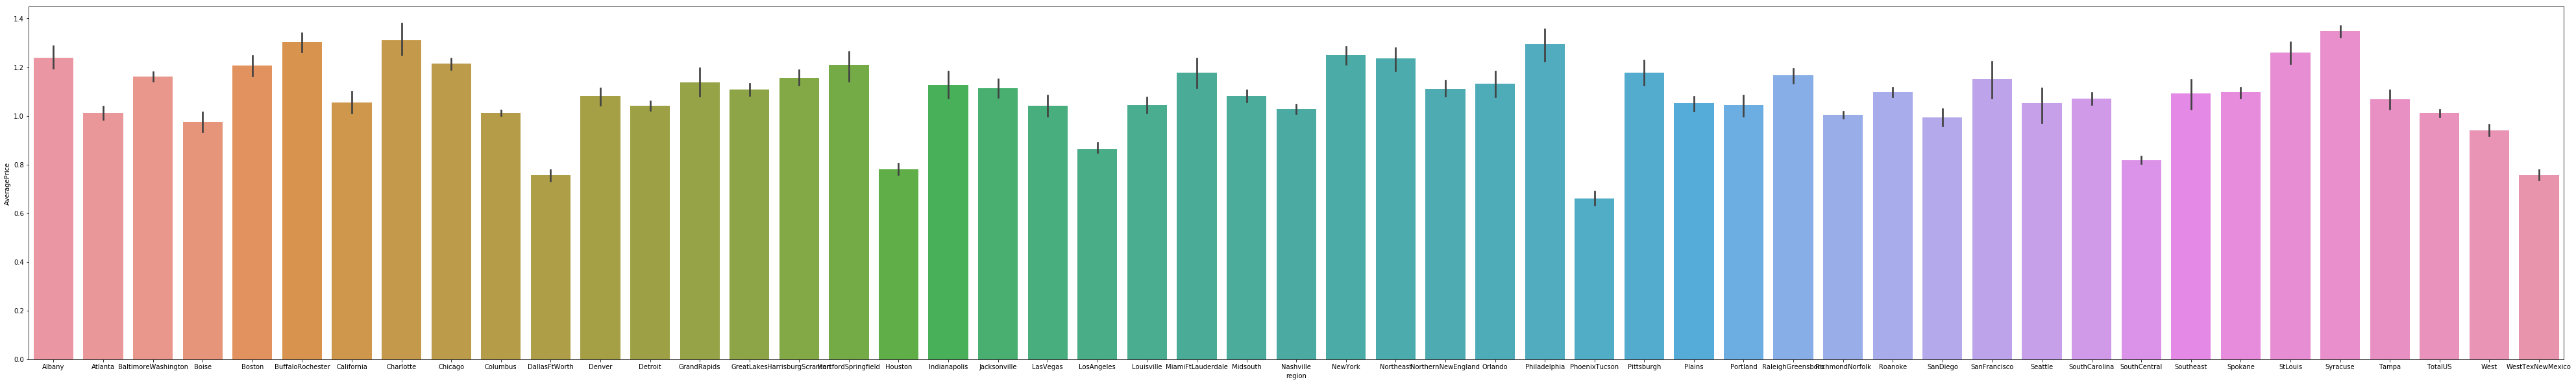

In [12]:
fig = plt.figure(figsize = (70,10))
sns.barplot(x = 'region', y = 'AveragePrice', data = df)

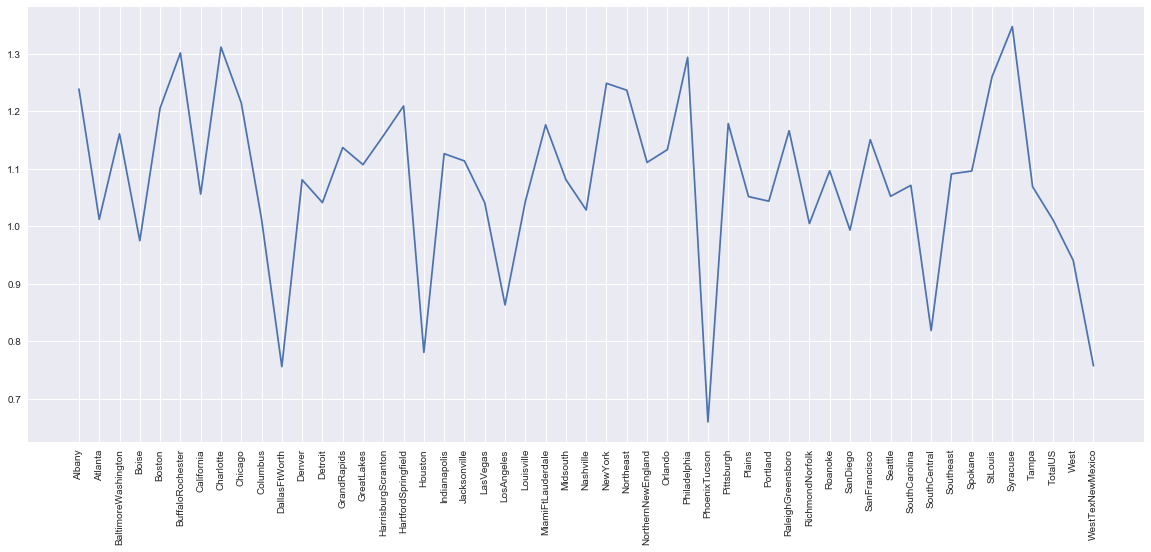

In [77]:
plt.figure(figsize=(20,8))
plt.plot(df.groupby(['region'])['AveragePrice'].mean())
plt.xticks(rotation=90)
plt.show()

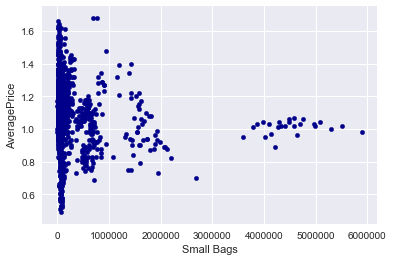

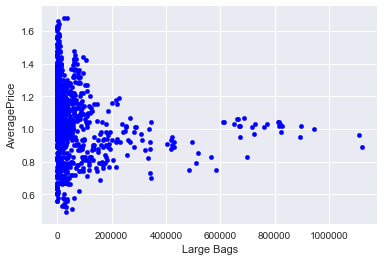

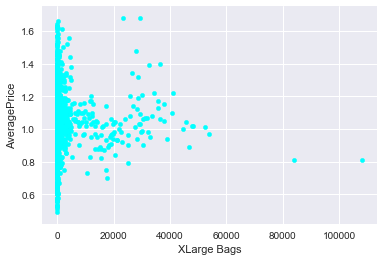

In [78]:
df.plot.scatter(x='Small Bags', y='AveragePrice',c='DarkBlue')
df.plot.scatter(x='Large Bags', y='AveragePrice',c='Blue')
df.plot.scatter(x='XLarge Bags', y='AveragePrice',c='Cyan')    

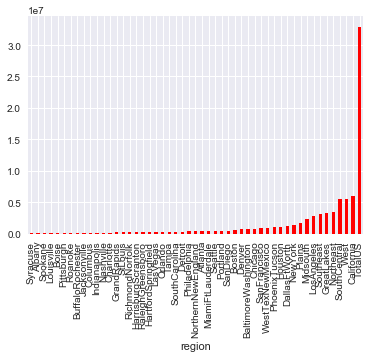

In [82]:
df.groupby('region')['Total Volume'].mean().sort_values().plot(kind='bar',color='r')

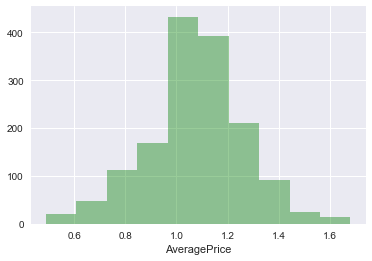

In [83]:
sns.distplot(df['AveragePrice'],bins=10, kde=False,color='g')

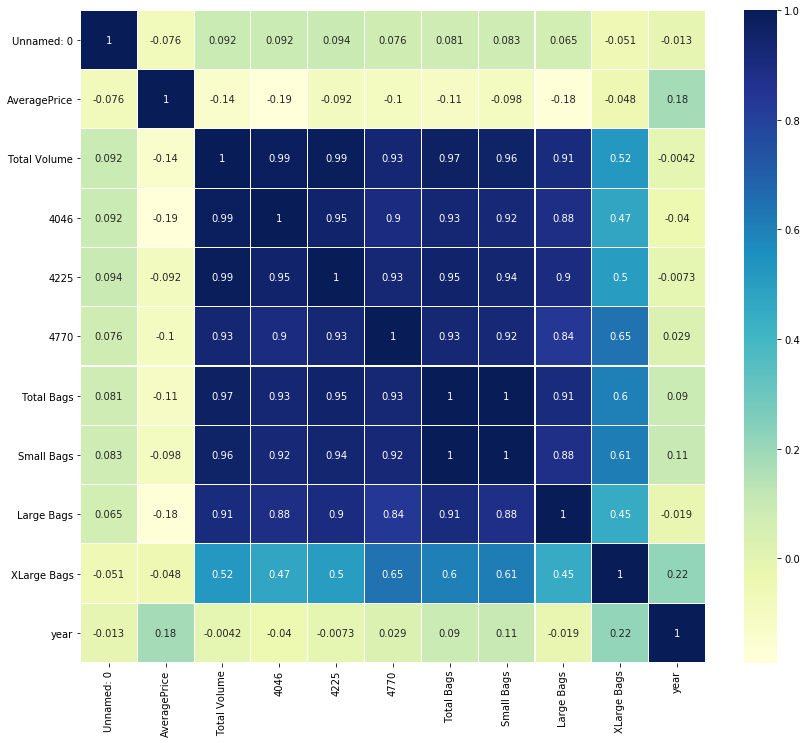

In [14]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

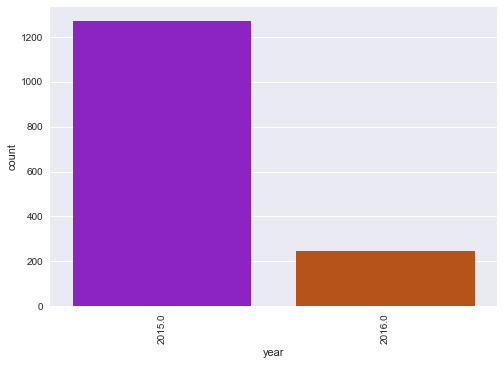

In [15]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

sns.countplot(df['year'], palette = 'gnuplot')


plt.xticks(rotation = 90)
plt.show()

In [16]:
df.groupby('year')['Total Volume'].mean()

year
2015.0    1.610065e+06
2016.0    1.559787e+06
Name: Total Volume, dtype: float64

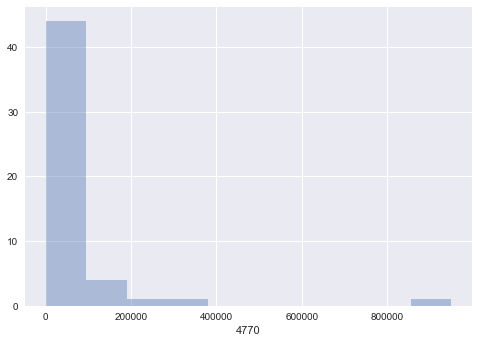

In [17]:
df.groupby('region')['4770'].mean()
sns.distplot(df.groupby('region')['4770'].mean(),bins=10, kde=False)

In [18]:
df.groupby('region')['AveragePrice'].mean()

region
Albany                 1.238657
Atlanta                1.012037
BaltimoreWashington    1.160923
Boise                  0.974923
Boston                 1.205484
BuffaloRochester       1.301569
California             1.055921
Charlotte              1.311613
Chicago                1.214783
Columbus               1.012553
DallasFtWorth          0.755882
Denver                 1.080833
Detroit                1.041250
GrandRapids            1.136957
GreatLakes             1.107222
HarrisburgScranton     1.157368
HartfordSpringfield    1.209231
Houston                0.780690
Indianapolis           1.126250
Jacksonville           1.113659
LasVegas               1.041000
LosAngeles             0.863333
Louisville             1.042941
MiamiFtLauderdale      1.176471
Midsouth               1.081111
Nashville              1.028400
NewYork                1.248636
Northeast              1.236667
NorthernNewEngland     1.111034
Orlando                1.133333
Philadelphia           1.293846
P

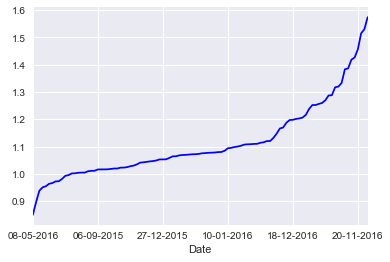

In [102]:
df.groupby('Date')['AveragePrice'].mean().sort_values().plot(kind='line',color='b')

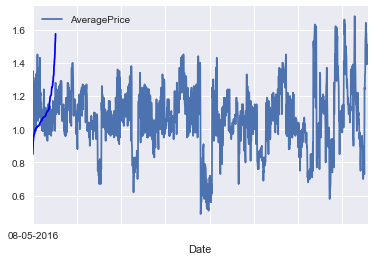

In [101]:
df.sort_index().plot(x='Date',y='AveragePrice',kind='line')


In [20]:
cost = df.drop(['4046','4225','4770','Large Bags','Small Bags','XLarge Bags','Total Volume'],axis=1)

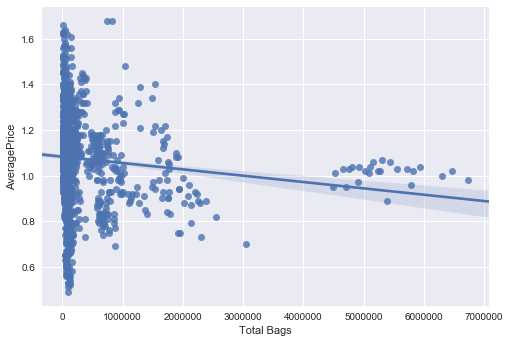

In [24]:

sns.regplot(df['Total Bags'],df['AveragePrice'])

In [29]:
train,test = train_test_split(df,train_size = 0.80,random_state = 35)

In [30]:
reg = linear_model.LinearRegression()

X_train,Y_train = pd.DataFrame(train['Total Bags']),train['AveragePrice']

In [44]:
model = reg.fit(X_train,Y_train)
print("cocoefficient Value: ",(np.float(model.coef_)),":Intercept Value: ",(model.intercept_))


cocoefficient Value:  -3.031951385015313e-08 :Intercept Value:  1.0823168117006416


In [36]:
X_test,Y_test = pd.DataFrame(test['Total Bags']),test['AveragePrice']

pred = model.predict(X_test)

In [37]:
mean_squared_error(Y_test,pred)

0.03333117334721905

In [38]:
r2_score(Y_test,pred)

0.0031229563624235457

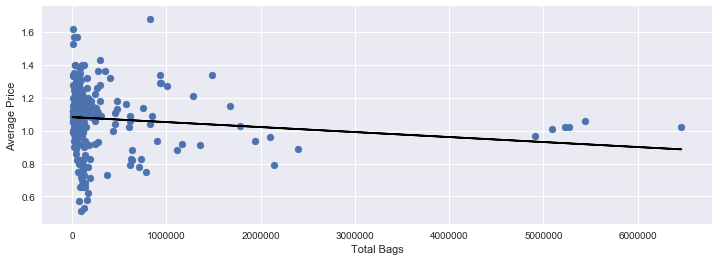

In [45]:
plt.figure(figsize=(12,4))

plt.scatter(X_test,Y_test)
plt.plot(X_test,pred,color = 'black')
plt.ylabel("Average Price")
plt.xlabel("Total Bags")
plt.show()

cocoefficient Value:  -6.281682817822945e-09 :Intercept Value:  1.0834961967364256
0.0330013277656942
0.012988060262069112


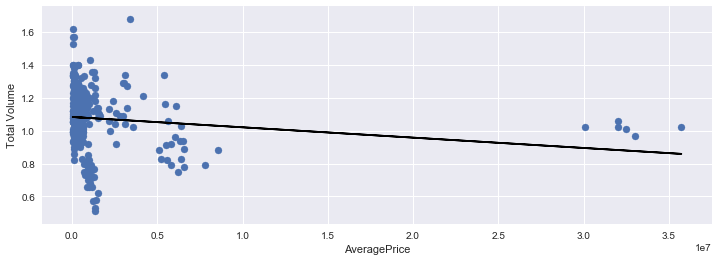

In [71]:
reg = linear_model.LinearRegression()

X_train,Y_train = pd.DataFrame(train['Total Volume']),train['AveragePrice']
model = reg.fit(X_train,Y_train)
print("cocoefficient Value: ",(np.float(model.coef_)),":Intercept Value: ",(model.intercept_))

X_test,Y_test = pd.DataFrame(test['Total Volume']),test['AveragePrice']

pred = model.predict(X_test)
print(mean_squared_error(Y_test,pred))
print(r2_score(Y_test,pred))
plt.figure(figsize=(12,4))

plt.scatter(X_test,Y_test)
plt.plot(X_test,pred,color = 'black')
plt.ylabel("Total Volume")
plt.xlabel("AveragePrice")
plt.show()

In [119]:
def GT(df_formatted, periods, draw=True):
    prop = GT()
    prop.fit(df_formatted)
    future_prop = prop.make_future_dataframe(periods=periods)
    forecast_prop = prop.predict(future_prop)
    if (draw == True):
        fig1_prop = prop.plot(forecast_prop)
        fig2_prop = prop.plot_components(forecast_prop)
    return forecast_prop

In [ ]:
df_TotalUS = df[df.region == 'TotalUS']
df_formatted=formatted_profit
periods=78
for type in ("organic", "conventional"):
    df_type = df_TotalUS[df_TotalUS.type == type]
    df_profit  = df_type[['Date', 'AveragePrice']]
    formatted_profit = df_profit.rename(columns={'Date':'ds', 'AveragePrice':'y'})
    forecast_profit = GT(formatted_profit, 78, draw=True)
    
plt.show()

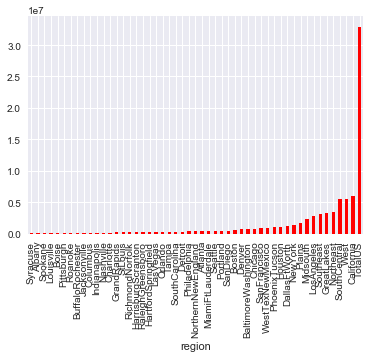

In [93]:
df.groupby('region')['Total Volume'].mean().sort_values().plot(kind='bar',color='r')

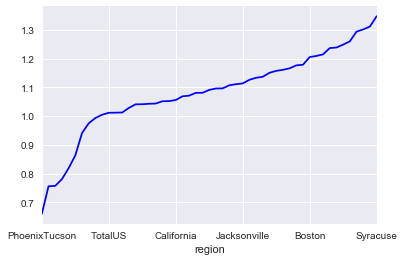

In [96]:

df.groupby('region')['AveragePrice'].mean().sort_values().plot(kind='line',color='b')


In [87]:
region=df['region'].unique()
regiondict = {}
for reg in region:
    regiondict[reg] = pd.DataFrame()
##    following code is same as above
##    regiondict = {reg : pd.DataFrame for reg in regions}

for key in regiondict.keys():
    regiondict[key] = df[:][df.region == key]

regiondict['TotalUS'].describe()


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,revenue
count,25.000000,25.0000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,25.0,2.500000e+01
mean,39.000000,1.0116,3.293714e+07,1.422580e+07,1.243888e+07,9.500911e+05,5.322368e+06,4.519090e+06,7.795461e+05,23732.280400,2015.0,3.321946e+07
std,7.359801,0.0413,4.010035e+06,1.911007e+06,1.951245e+06,1.643601e+05,5.987639e+05,5.523663e+05,1.359738e+05,14983.644258,0.0,3.221096e+06
min,27.000000,0.8900,2.801252e+07,1.154481e+07,9.783490e+06,7.379394e+05,4.498940e+06,3.585322e+06,6.103492e+05,7461.200000,2015.0,2.885290e+07
25%,33.000000,1.0000,2.998265e+07,1.262856e+07,1.121054e+07,8.440933e+05,4.908091e+06,4.129139e+06,6.731494e+05,13350.500000,2015.0,3.053546e+07
50%,39.000000,1.0200,3.204640e+07,1.383372e+07,1.213477e+07,8.897322e+05,5.234561e+06,4.477300e+06,7.625275e+05,18878.910000,2015.0,3.283869e+07
75%,45.000000,1.0400,3.534418e+07,1.550361e+07,1.324447e+07,1.066386e+06,5.713003e+06,4.747545e+06,8.223998e+05,31924.400000,2015.0,3.628556e+07
max,51.000000,1.0700,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,53733.650000,2015.0,3.974336e+07


In [88]:
regiondict['NewYork'].describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,revenue
count,44.000000,44.000000,4.400000e+01,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,4.400000e+01
mean,21.500000,1.248636,1.362973e+06,20449.793409,1.052267e+06,1928.949545,288327.230682,232935.729091,55324.481818,67.019773,2015.0,1.692020e+06
std,12.845233,0.121972,2.651828e+05,3822.406037,2.546898e+05,1305.330974,60204.188611,49072.855540,18178.080938,173.751213,0.0,3.094447e+05
min,0.000000,0.970000,9.991696e+05,13652.410000,7.494611e+05,540.630000,164640.740000,136643.230000,27997.510000,0.000000,2015.0,1.159037e+06
25%,10.750000,1.160000,1.190112e+06,18480.135000,8.870293e+05,981.740000,244658.395000,197830.562500,42328.840000,0.000000,2015.0,1.497661e+06
50%,21.500000,1.230000,1.314052e+06,20326.405000,9.485819e+05,1589.515000,281919.980000,220581.235000,55896.490000,0.000000,2015.0,1.649436e+06
75%,32.250000,1.360000,1.482806e+06,22847.085000,1.190263e+06,2257.690000,339938.537500,267746.820000,65735.692500,11.760000,2015.0,1.799665e+06
max,43.000000,1.450000,2.180520e+06,31886.430000,1.916955e+06,5470.640000,404479.550000,323080.990000,103965.160000,680.560000,2015.0,2.584685e+06


In [4]:
regiondict['California'].describe()

NameError: name 'regiondict' is not defined

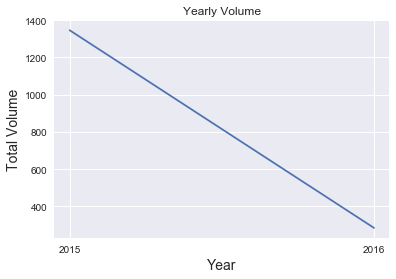

In [106]:

con= df[df.type == 'conventional']
mean_price_conv_dict={}
for yr in years:
   
    mean_price_conv_dict[yr]= con[ con.year == yr ] .AveragePrice.mean()
print(mean_price_conv_dict)

{2015.0: 1.060110236220472, 2016.0: 1.151497975708502}


([<matplotlib.axis.XTick at 0x1e93926a198>,
 <a list of 2 Text xticklabel objects>)

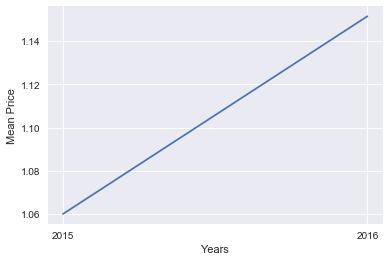

In [109]:
lists2 = sorted(mean_price_conv_dict.items()) # sorted by key, return a list of tuples
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
line2= plt.plot(x2, y2, label= 'conventional')

plt.xlabel('Years')
plt.ylabel('Mean Price')
plt.xticks(years)
